Importing packages

In [161]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from matplotlib import pyplot
from sklearn import metrics


reading csv and creating dataframes


In [162]:
df = pd.read_csv('csgo_games/csgo_games.csv', usecols=['team_1', 'team_2', 'winner'])
df1 = pd.read_csv('results/results.csv', usecols=['team_1', 'team_2', 'winner'])
df1['team_1'] = df1['team_1'].str.upper()
df1['team_2'] = df1['team_2'].str.upper()


concetenating dataframes


In [163]:
df = pd.concat([
    df, df1
])
df


,team_1,team_2,winner
0,CLOUD9,HELLRAISERS,t2
1,IMMORTALS,G2,t2
2,MOUSESPORTS,IMMORTALS,t1
3,DIGNITAS,G2,t1
4,OPTIC,HELLRAISERS,t1
...,...,...,...
45768,G2,E-FRAG.NET,2
45769,G2,E-FRAG.NET,1
45770,CLG,LIQUID,1
45771,NIP,DIGNITAS,1


deleting dublicates


In [164]:
df = df.drop_duplicates(subset=['team_1', 'team_2'])
df


,team_1,team_2,winner
0,CLOUD9,HELLRAISERS,t2
1,IMMORTALS,G2,t2
2,MOUSESPORTS,IMMORTALS,t1
3,DIGNITAS,G2,t1
4,OPTIC,HELLRAISERS,t1
...,...,...,...
45745,TITAN,NATUS VINCERE,2
45754,LUMINOSITY,TITAN,2
45760,TITAN,LUMINOSITY,2
45765,VEXED,CSGL,1


creating le for df

In [165]:
lb = LabelEncoder()
df['team_1'] = lb.fit_transform(df['team_1'])
df['team_2'] = lb.fit_transform(df['team_2'])
df


C:\Users\66964\AppData\Local\Temp\ipykernel_14288\3291313526.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['team_1'] = lb.fit_transform(df['team_1'])
C:\Users\66964\AppData\Local\Temp\ipykernel_14288\3291313526.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['team_2'] = lb.fit_transform(df['team_2'])


,team_1,team_2,winner
0,219,596,t2
1,572,520,t2
2,743,626,t1
3,271,520,t1
4,816,596,t1
...,...,...,...
45745,1098,831,2
45754,680,1226,2
45760,1098,752,2
45765,1158,259,1


replacing values in df

In [166]:
df['winner'] = df['winner'].replace(['t1', 't2', 'draw'], [1, 2, 0])

df['team_1'] = df['team_1'].astype('int64')
df['team_2'] = df['team_2'].astype('int64')
df['winner'] = df['winner'].astype('int64')


C:\Users\66964\AppData\Local\Temp\ipykernel_14288\3835946369.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['winner'] = df['winner'].replace(['t1', 't2', 'draw'], [1, 2, 0])
C:\Users\66964\AppData\Local\Temp\ipykernel_14288\3835946369.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['team_1'] = df['team_1'].astype('int64')
C:\Users\66964\AppData\Local\Temp\ipykernel_14288\3835946369.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc

creating trains for model


In [167]:
array = df.values

X = array[:, 0:2]

y = array[:, -1]
y.astype('int')


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [168]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


choosing the best model for prediction

c:\Users\66964\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\66964\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\66964\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\66964\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep t

c:\Users\66964\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\66964\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\66964\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\66964\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep t

LR: 0.529308 (0.000262)
LDA: 0.529308 (0.000262)
KNN: 0.520991 (0.010666)
CART: 0.521551 (0.008844)
NB: 0.529308 (0.000262)
SVM: 0.529468 (0.000506)


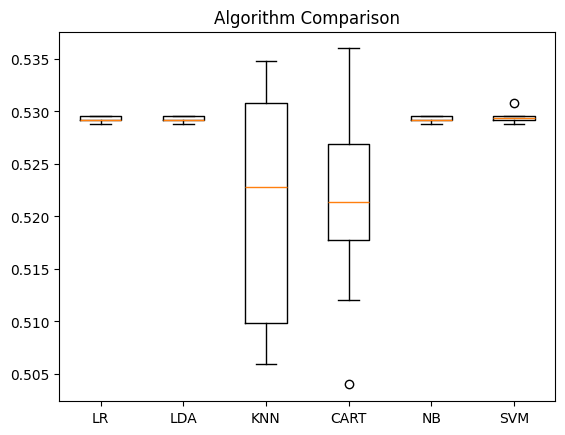

In [169]:
models = []
models.append(('LR', LogisticRegression(penalty='none', max_iter=1000)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

# оцениваем модель на каждой итерации
results = []
names = []

for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()


training model and make a prediction

In [170]:
model = LogisticRegression(solver='liblinear', multi_class='ovr')
model.fit(X_train, y_train)

pred =  model.predict(X_test)

metrics.accuracy_score(y_test, pred)


0.540134314039015

In [171]:
d1, d2 = input(), input()

a = lb.transform([d1, d2])

pred = model.predict([a])
print(*pred)


1
